<a href="https://colab.research.google.com/github/1tony0/BrainTumorClassification_with_NeuralNetworks/blob/main/BrainTumorClassificationML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:01<00:00, 90.1MB/s]
100% 149M/149M [00:01<00:00, 88.8MB/s]


This function takes in the data and will transform it into data frame

In [3]:
def get_class_paths(path):
   classes = []
   class_paths = []

   # Iterate through directories in the training path
   for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

    # Create a Dataframe with the collected data
    df = pd.DataFrame({
        'Class Path' : class_paths,
        'Class': classes
    })

   return df

In [4]:
tr_df = get_class_paths('/content/Training')

In [5]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0860.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0955.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0553.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0740.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_1164.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_1269.jpg,glioma
5708,/content/Training/glioma/Tr-gl_1129.jpg,glioma
5709,/content/Training/glioma/Tr-gl_1302.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0026.jpg,glioma


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0029.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0042.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0173.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0228.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0264.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0287.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0256.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0224.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0211.jpg,glioma


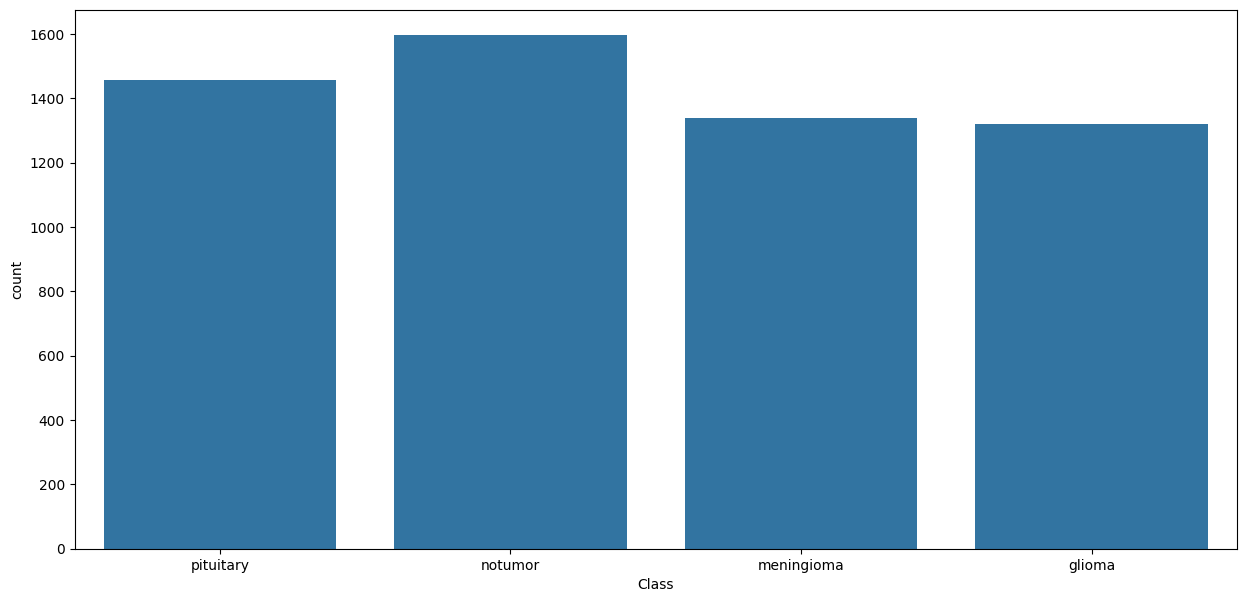

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot( data=tr_df, x=tr_df['Class'])

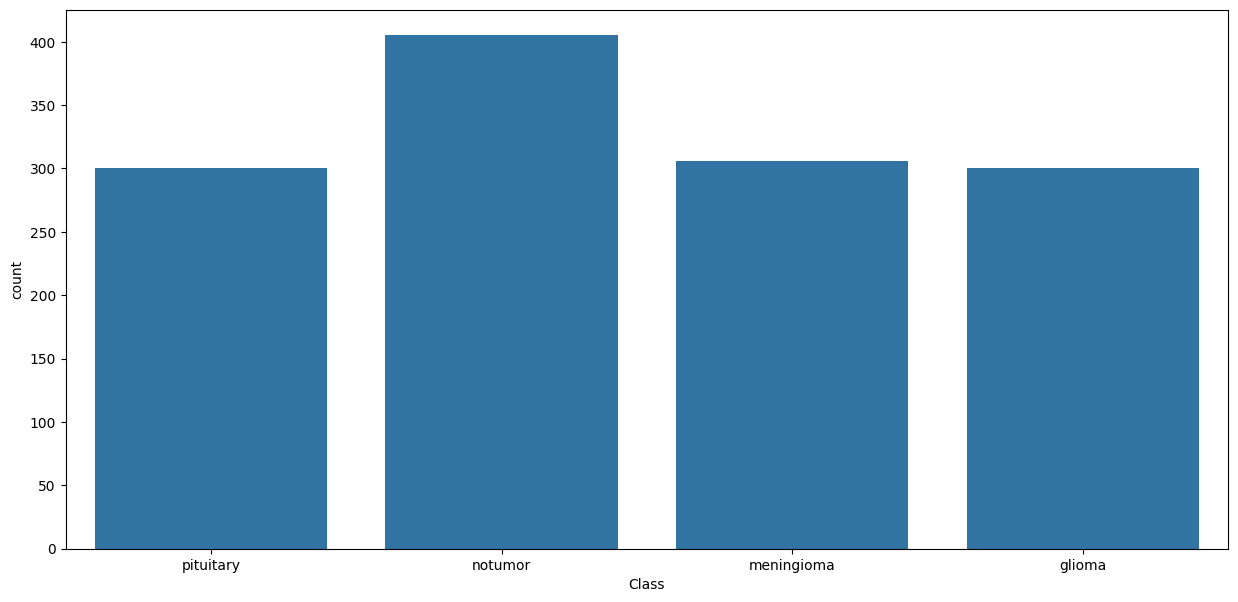

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

Sequential will allow us to create a Neural network model layer by layer. It makes it easier for us to create deep learning models

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
182,/content/Testing/pituitary/Te-pi_0079.jpg,pituitary
1061,/content/Testing/glioma/Te-gl_0074.jpg,glioma
953,/content/Testing/meningioma/Te-me_0242.jpg,meningioma
257,/content/Testing/pituitary/Te-pi_0194.jpg,pituitary
1189,/content/Testing/glioma/Te-gl_0039.jpg,glioma
...,...,...
62,/content/Testing/pituitary/Te-pi_0183.jpg,pituitary
790,/content/Testing/meningioma/Te-me_0105.jpg,meningioma
294,/content/Testing/pituitary/Te-piTr_0008.jpg,pituitary
488,/content/Testing/notumor/Te-no_0166.jpg,notumor


In [13]:
ts_df

,Class Path,Class
298,/content/Testing/pituitary/Te-pi_0044.jpg,pituitary
476,/content/Testing/notumor/Te-no_0382.jpg,notumor
264,/content/Testing/pituitary/Te-pi_0048.jpg,pituitary
459,/content/Testing/notumor/Te-no_0253.jpg,notumor
1180,/content/Testing/glioma/Te-gl_0187.jpg,glioma
...,...,...
843,/content/Testing/meningioma/Te-me_0244.jpg,meningioma
1202,/content/Testing/glioma/Te-gl_0250.jpg,glioma
529,/content/Testing/notumor/Te-no_0093.jpg,notumor
1090,/content/Testing/glioma/Te-gl_0081.jpg,glioma


We can see that the validation data and testing data are evenly split(ish)

In [14]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

Now we can use these generators to create three data flows. One for Validation, One for training and one for testing.

In [15]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


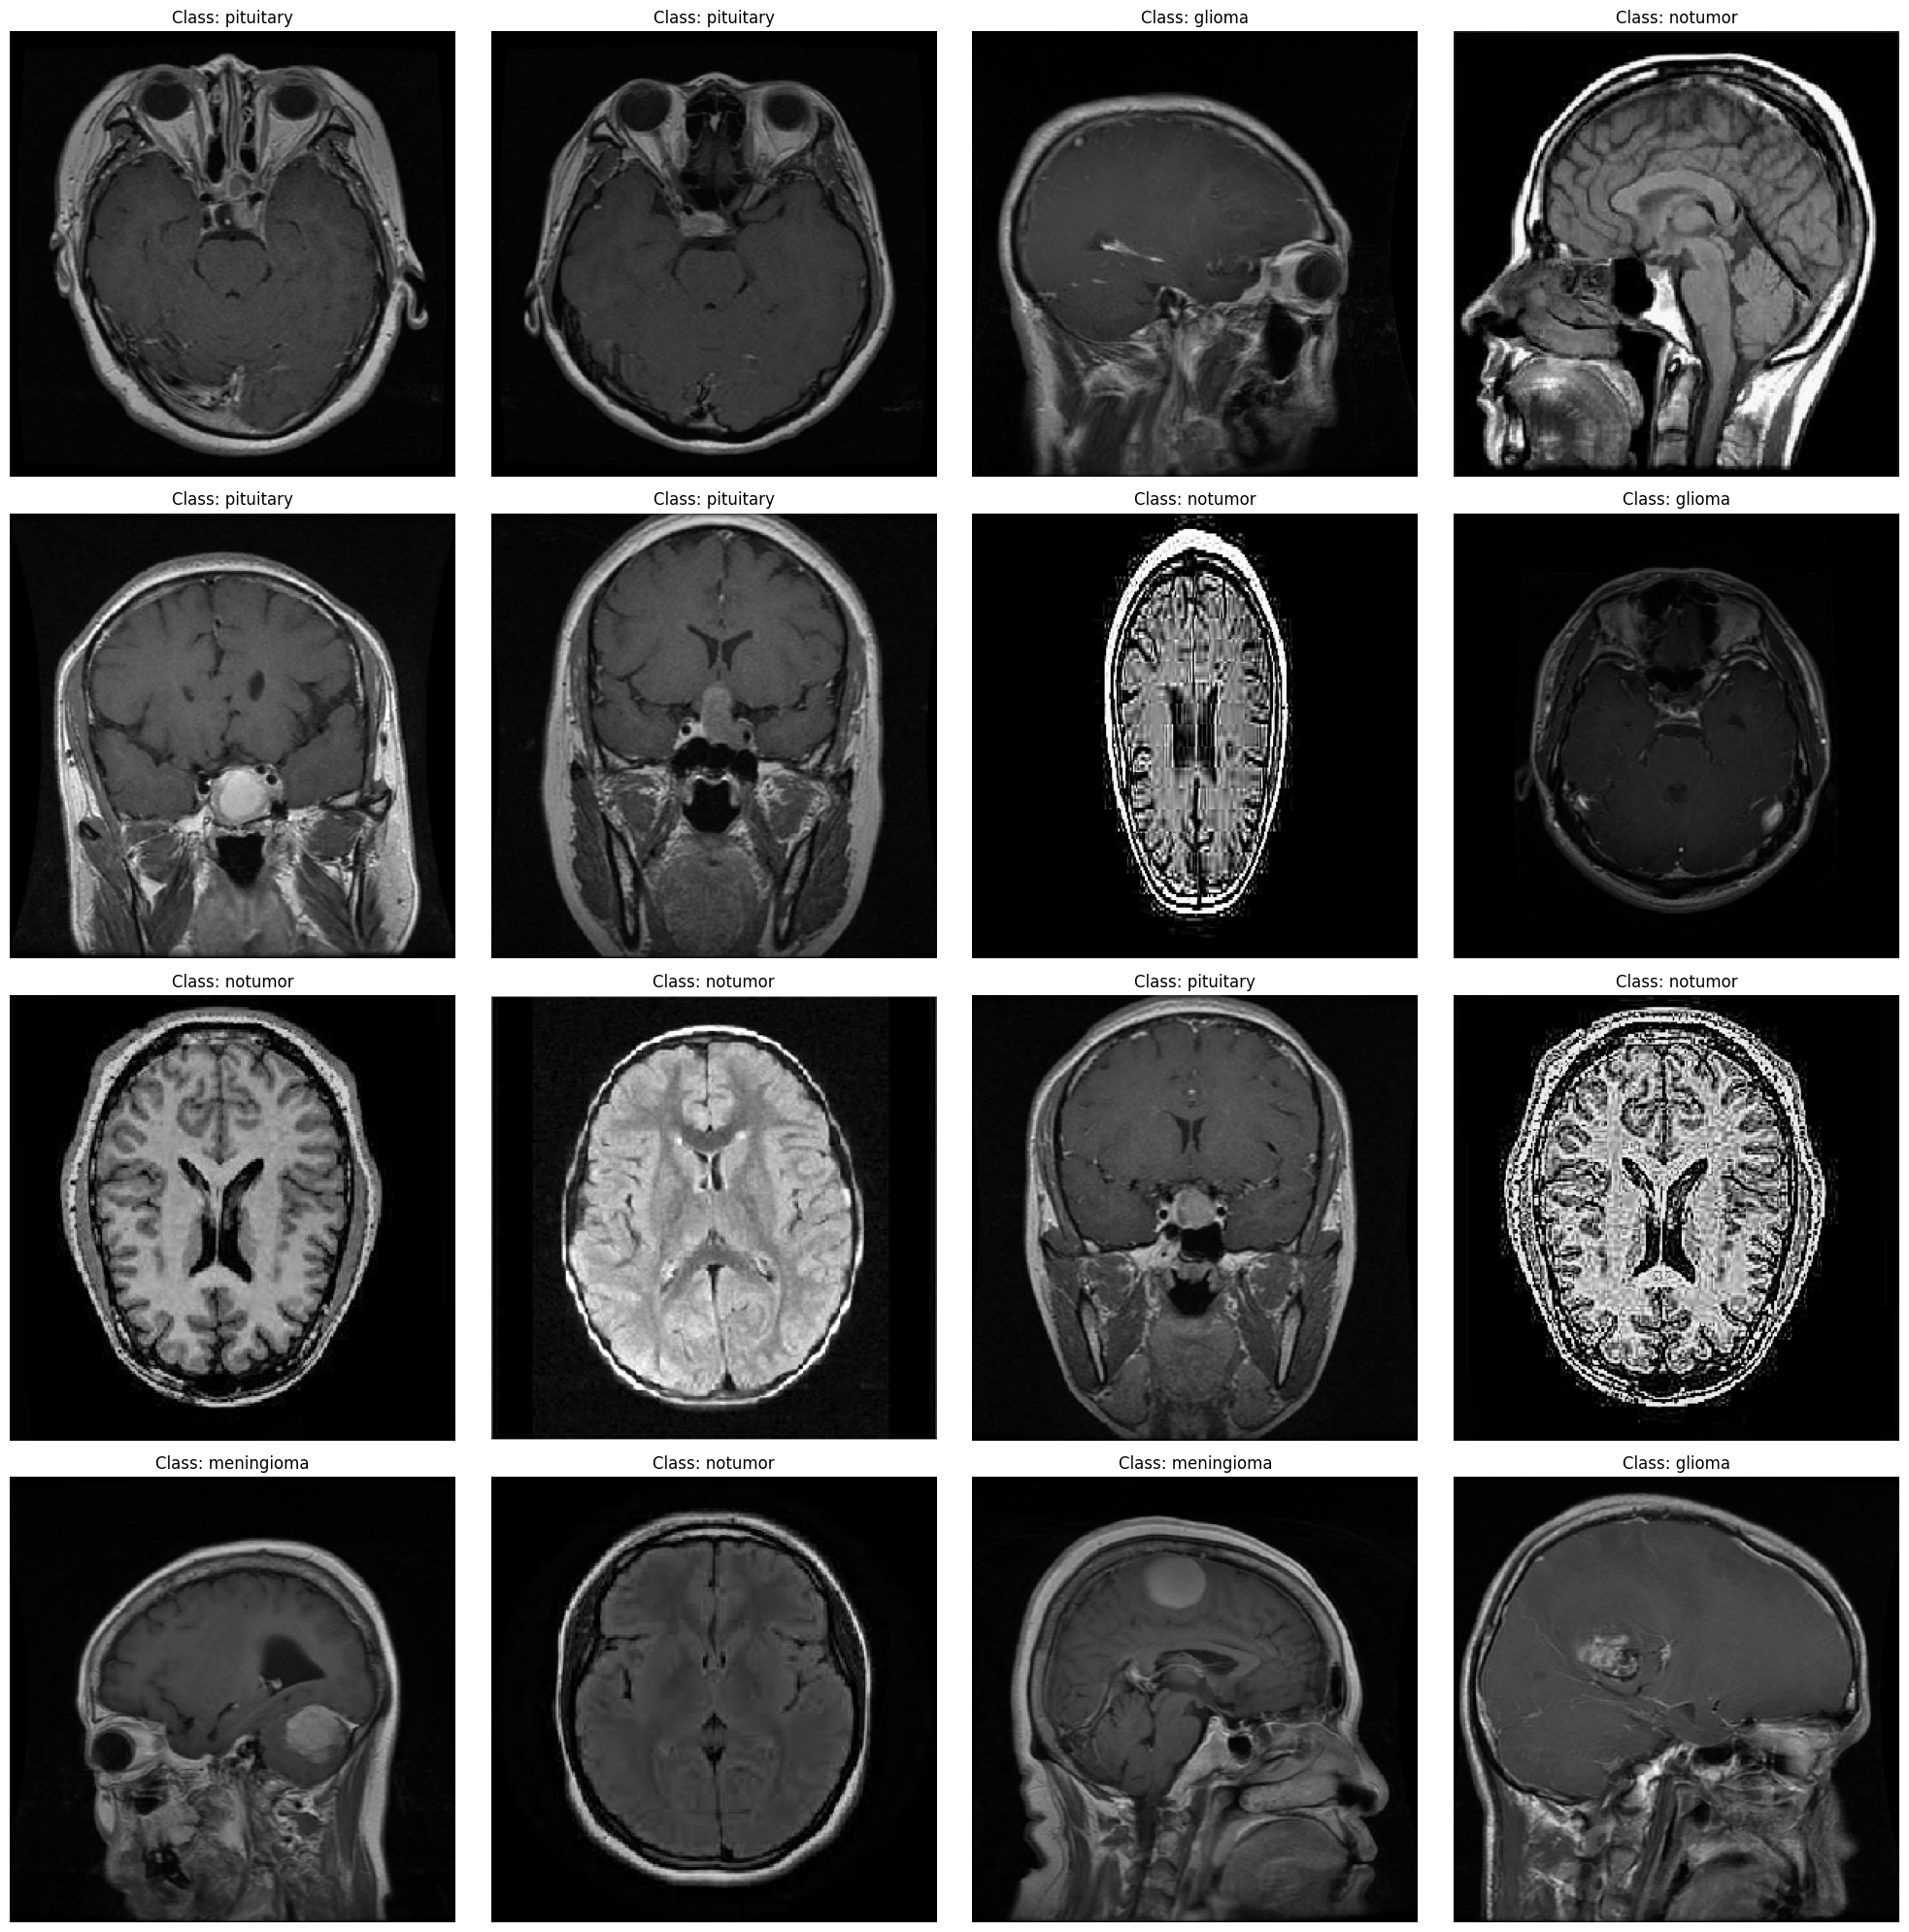

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.compile(Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= ['accuracy',
    Precision(),
    Recall()])

The model that we will use will be the Xception Model. This breaks down a image into smaller and smaller features and then will descide what is in the image

This model learns from back propagation. Back propagation is just learning from itself and it recognizes mistakes and will improve over time

Adamax helps the model learn more effectiveley. This function is looking for the smallest loss value. When we train our model, we will compare expected output to actual output and it will give us a loss value. We are comparing this and getting the loss value. Adamax helps direct the model towards the right step wether to take bigger steps, or smaller.

Lower learning rate means the model is taking smaller steps. It learns more slowly, but also learns more. A higher learning rate might also cause overshooting and give you wrong values.

The reason we are using a GPU is to speed up the learning process

In [19]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.8066 - loss: 0.5742 - precision: 0.8497 - recall: 0.7429 - val_accuracy: 0.9527 - val_loss: 0.1505 - val_precision: 0.9555 - val_recall: 0.9496
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 207s 867ms/step - accuracy: 0.9820 - loss: 0.0547 - precision: 0.9831 - recall: 0.9809 - val_accuracy: 0.9405 - val_loss: 0.1543 - val_precision: 0.9405 - val_recall: 0.9405
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 870ms/step - accuracy: 0.9918 - loss: 0.0250 - precision: 0.9923 - recall: 0.9909 - val_accuracy: 0.9466 - val_loss: 0.1915 - val_precision: 0.9466 - val_recall: 0.9466
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 870ms/step - accuracy: 0.9928 - loss: 0.0262 - precision: 0.9933 - recall: 0.9922 - val_accuracy: 0.9832 - val_loss: 0.0502 - val_precision: 0.9862 - val_recall: 0.9832
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 865ms/step - accuracy: 0.9974 - loss: 0.0136 - precision: 0.9975 - recall: 0.9974 - val_accuracy: 0.9878 - val_loss: 

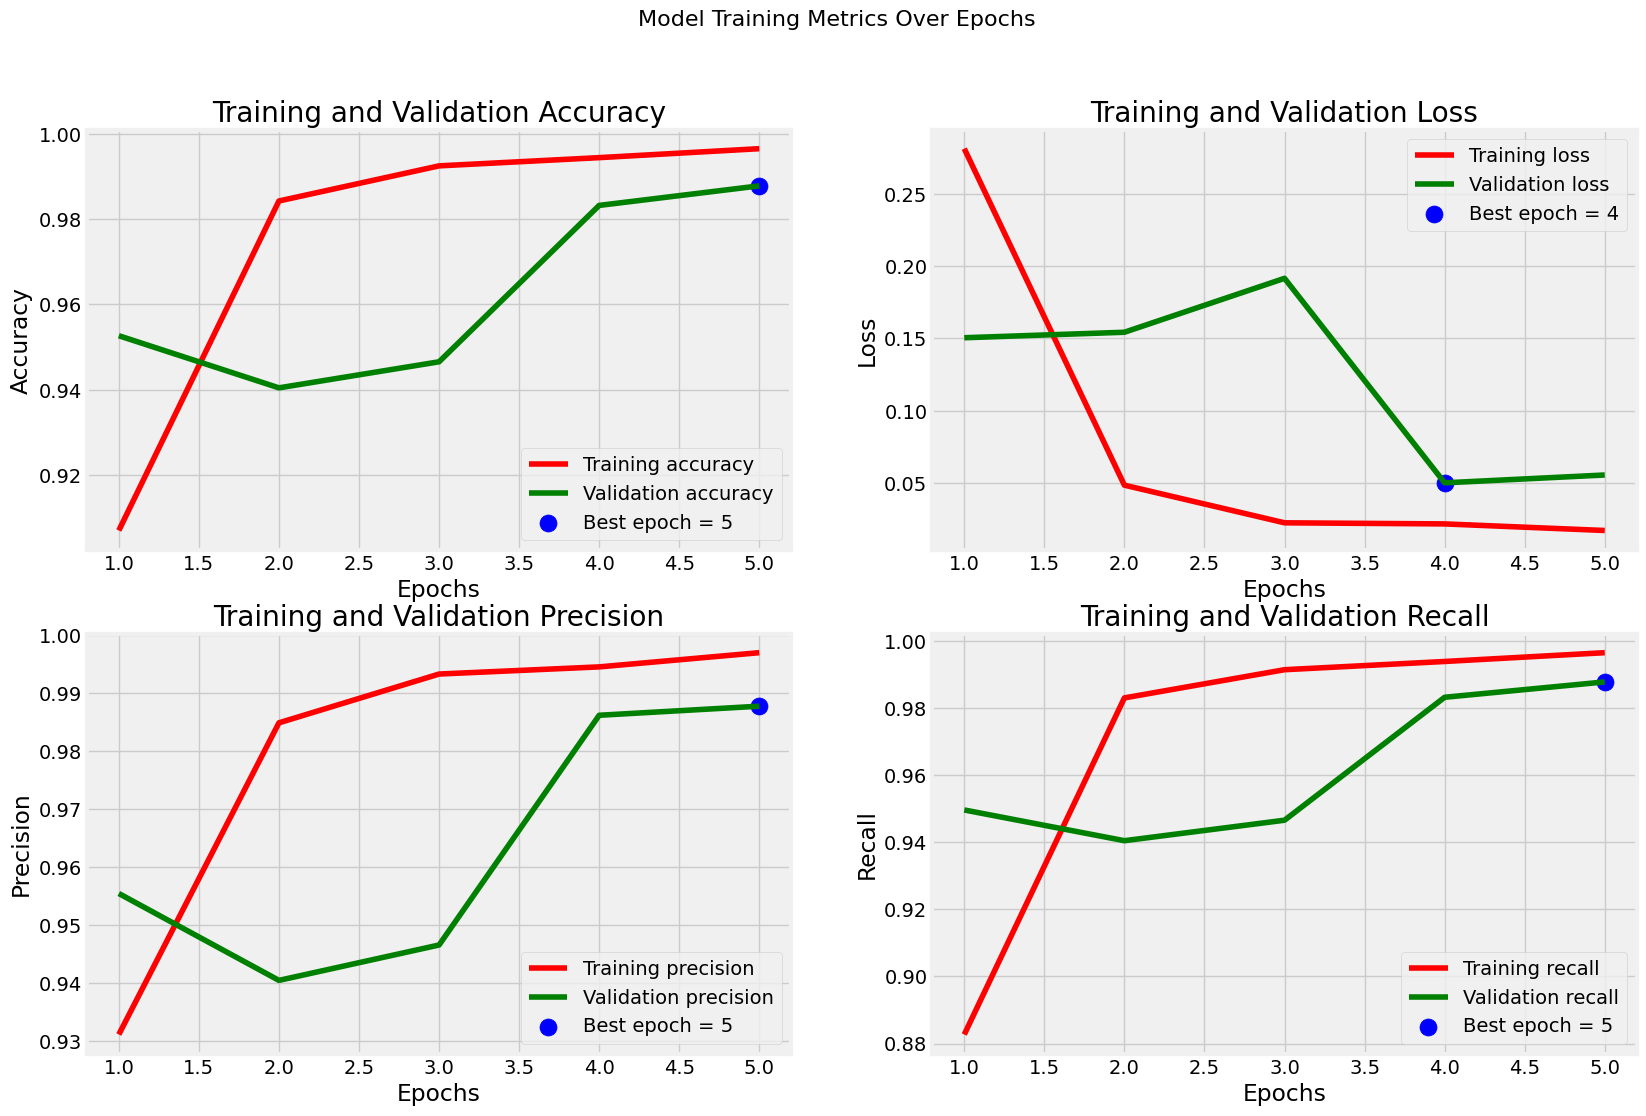

In [20]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


The blue dot represents when the value was the highest

In [21]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 257ms/step - accuracy: 0.9987 - loss: 0.0032 - precision: 0.9991 - recall: 0.9987
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.9826 - loss: 0.0727 - precision: 0.9826 - recall: 0.9826
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 1.0000 - loss: 0.0011 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9880 - loss: 0.0695 - precision: 0.9880 - recall: 0.9880
Train Accuracy: 99.82%
Train Loss: 0.0058


Validation Accuracy: 98.78%
Validation Loss: 0.0569


Test Accuracy: 98.93%
Test Loss: 0.0539


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step


Text(0.5, 1.0, 'Confusion Matrix')

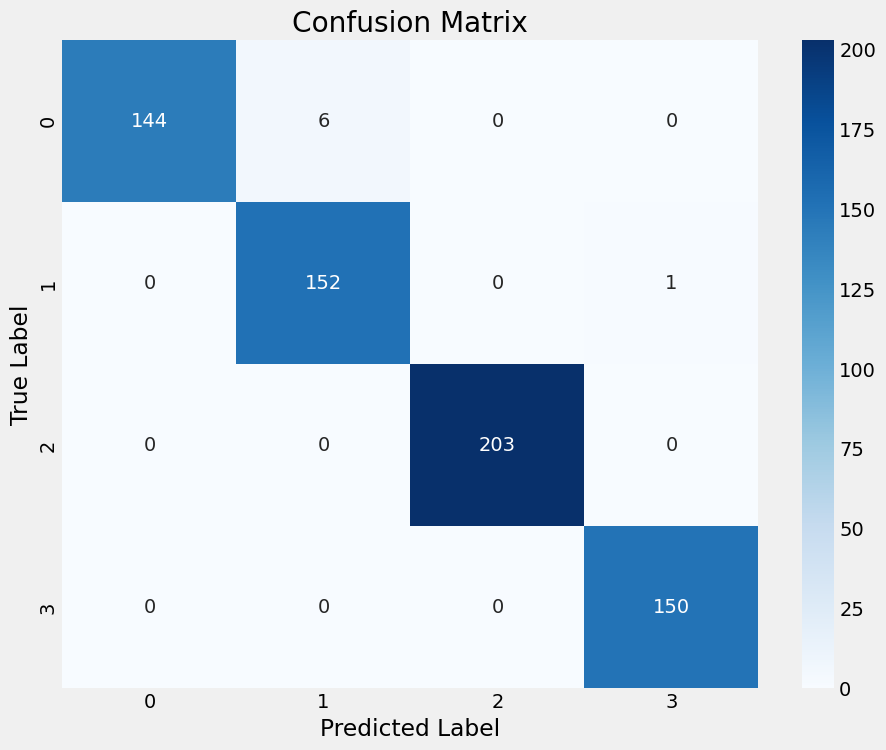

In [22]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [23]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6,8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


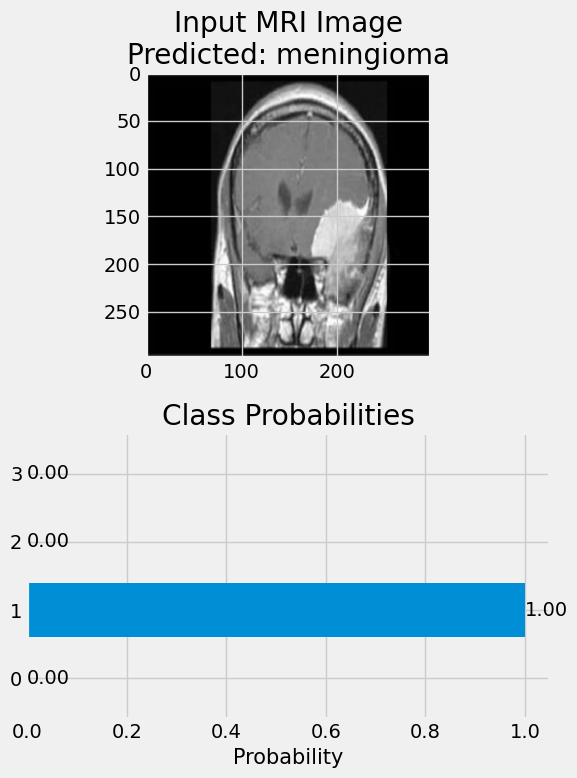


Predicted tumor type: meningioma


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


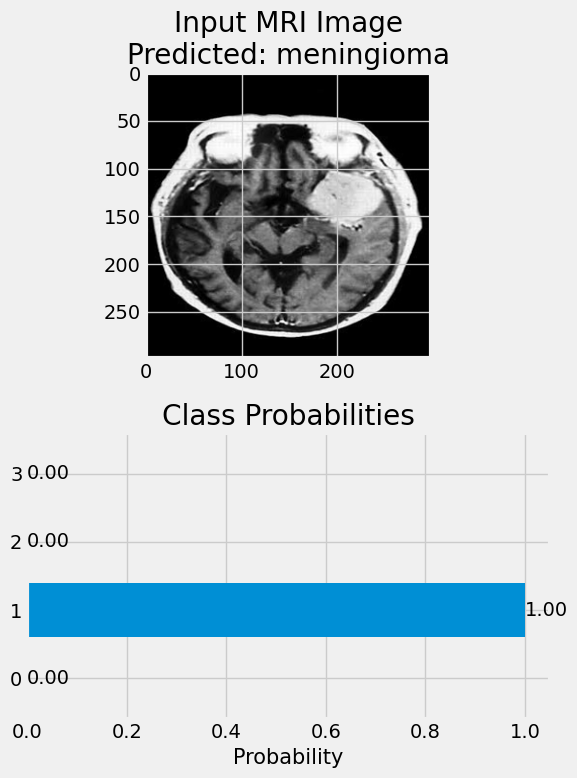


Predicted tumor type: meningioma


In [25]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


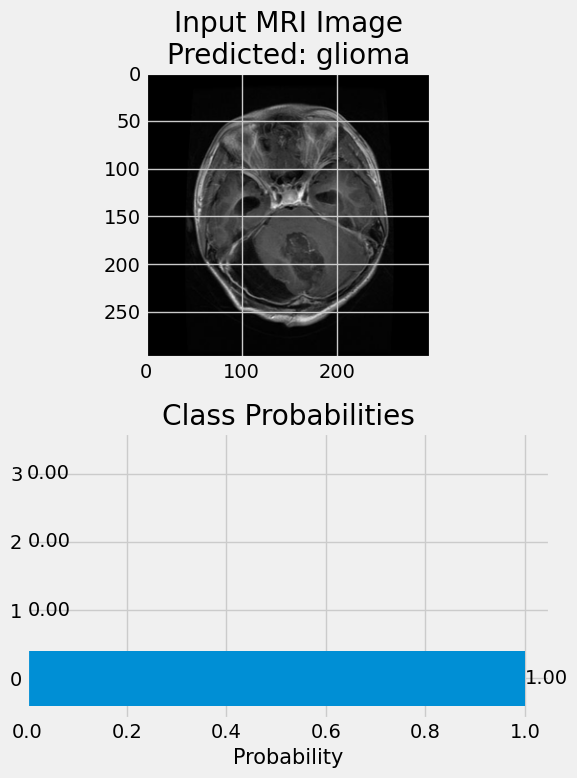


Predicted tumor type: glioma


In [26]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

We are now going to train a Custom CNN model. It will be smaller, but we want to have a high level of accuracy. Since it is a smaller model, it does not need as much memory. it is suitable for low-end edge devices.

In [27]:
model.save_weights("xception_model.weights.h5")

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [29]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
# Create a sequential model
cnn_model = Sequential()

# Convolutional Layers
# Each filter
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= ['accuracy',
    Precision(),
    Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 175s 407ms/step - accuracy: 0.5568 - loss: 2.2665 - precision_1: 0.6989 - recall_1: 0.3819 - val_accuracy: 0.7756 - val_loss: 0.8569 - val_precision_1: 0.7841 - val_recall_1: 0.7206
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 108s 301ms/step - accuracy: 0.8129 - loss: 0.7262 - precision_1: 0.8325 - recall_1: 0.7799 - val_accuracy: 0.8122 - val_loss: 0.6379 - val_precision_1: 0.8195 - val_recall_1: 0.7695
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 307ms/step - accuracy: 0.8531 - loss: 0.5372 - precision_1: 0.8725 - recall_1: 0.8397 - val_accuracy: 0.8626 - val_loss: 0.5187 - val_precision_1: 0.8794 - val_recall_1: 0.8351
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 108s 301ms/step - accuracy: 0.9012 - loss: 0.4286 - precision_1: 0.9100 - recall_1: 0.8910 - val_accuracy: 0.8611 - val_loss: 0.5054 - val_precision_1: 0.8669 - val_recall_1: 0.8550
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 108s 301ms/step - accuracy: 0.9153 - loss: 0.3717 - precision_1: 0.9238 - recall_1: 0.9

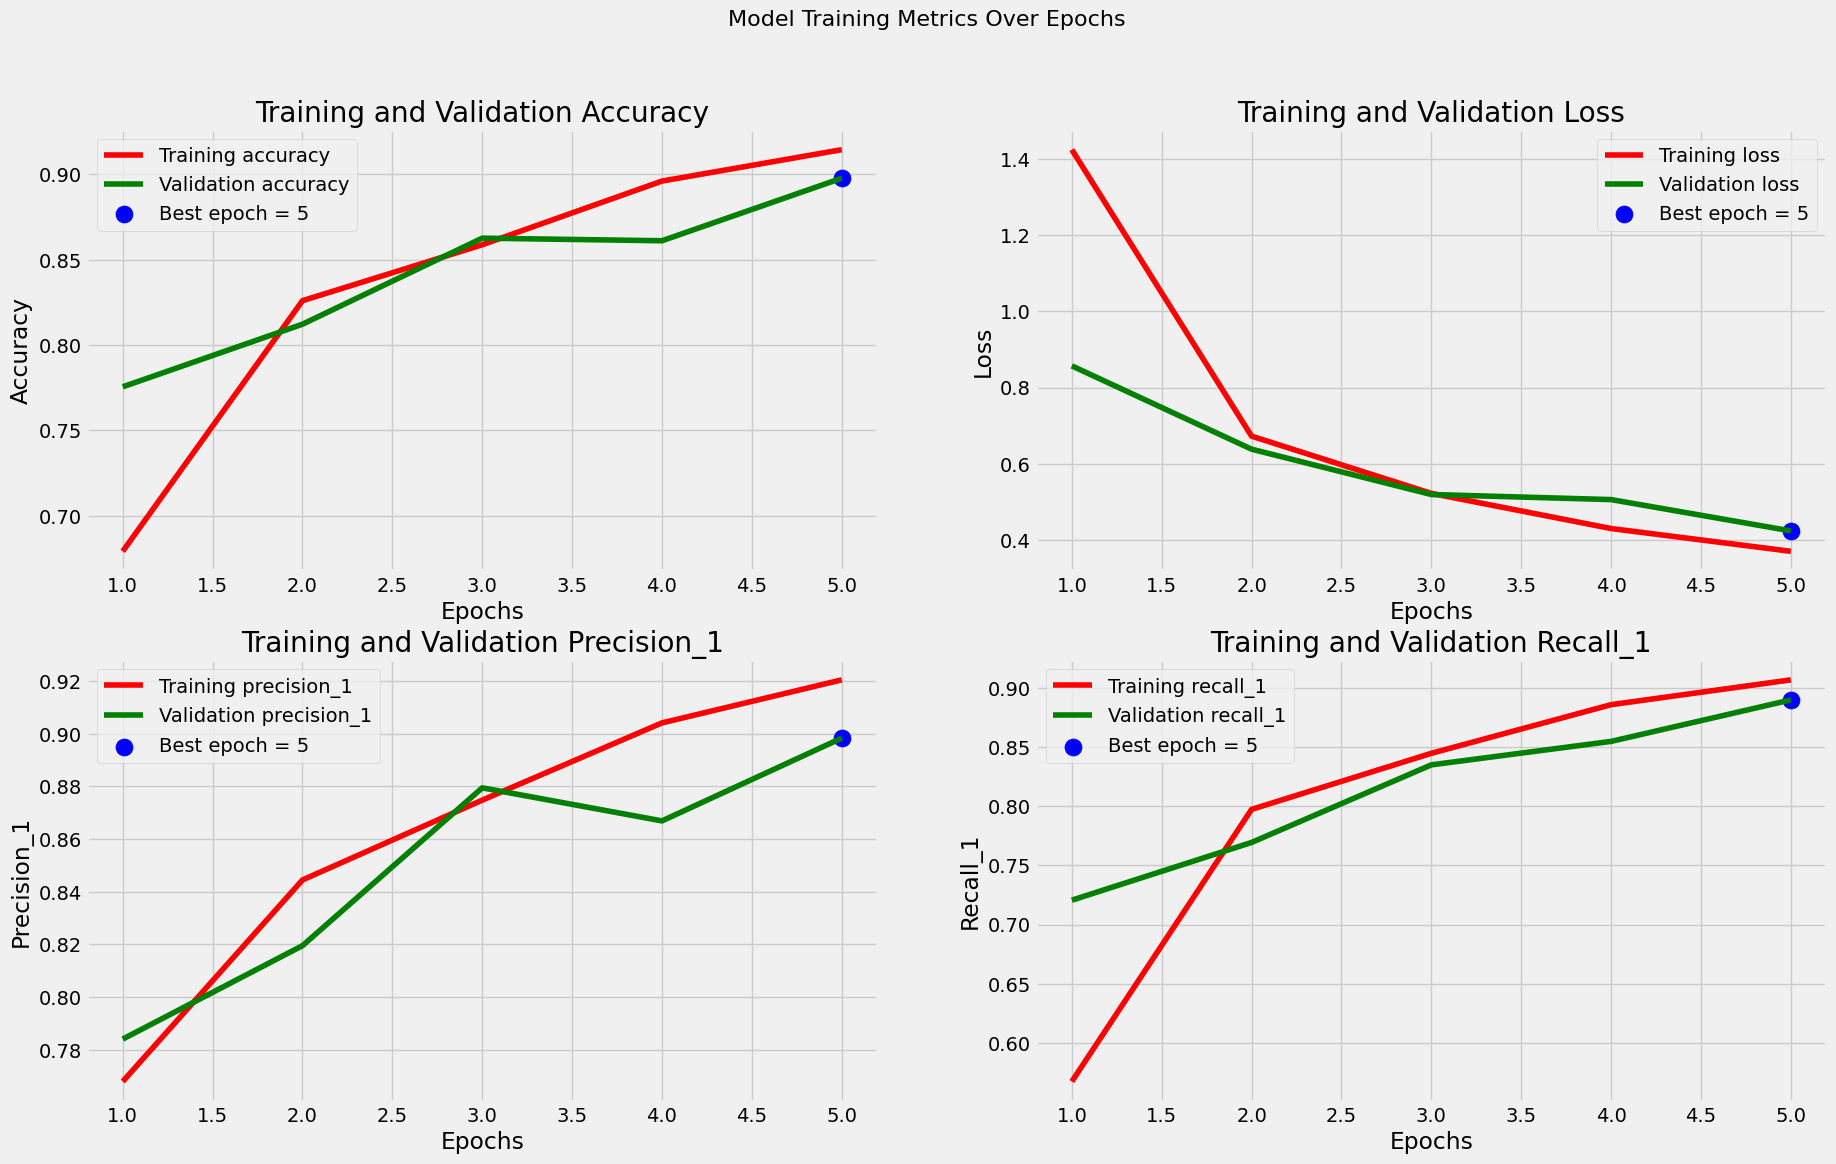

In [32]:
# Get training and validation metrics from history
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1'] # Updated metrics list
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# ... rest of the code remains the same

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [33]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.9594 - loss: 0.2641 - precision_1: 0.9613 - recall_1: 0.9550
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8997 - loss: 0.3922 - precision_1: 0.9017 - recall_1: 0.8915
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9688 - loss: 0.2569 - precision_1: 0.9688 - recall_1: 0.9688 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9343 - loss: 0.3268 - precision_1: 0.9368 - recall_1: 0.9343
Train Accuracy: 95.85%
Train Loss: 0.2681


Validation Accuracy: 89.31%
Validation Loss: 0.4139


Test Accuracy: 91.92%
Test Loss: 0.3389


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


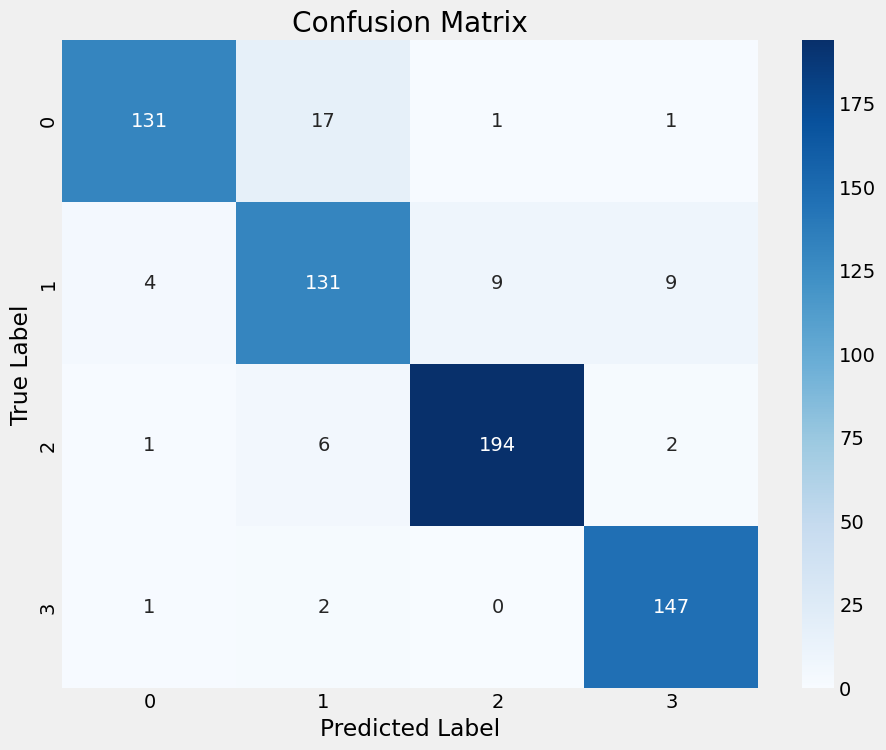

In [34]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       150
           1       0.84      0.86      0.85       153
           2       0.95      0.96      0.95       203
           3       0.92      0.98      0.95       150

    accuracy                           0.92       656
   macro avg       0.92      0.92      0.92       656
weighted avg       0.92      0.92      0.92       656



In [36]:
cnn_model.save("cnn_model.h5")

In [37]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [38]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [39]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [40]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [41]:
%%writefile app.py

import os
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import PIL.Image
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    # First prompt to generate an initial explanation
    initial_prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan. The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your final response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Include all the numbers in this data, and what they represent.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")

    # Generate the initial response
    initial_response = model.generate_content([initial_prompt, img]).text

    # Second prompt using the first response to refine the final output
    refinement_prompt = f"""Based on the following expert analysis of the saliency map:

    "{initial_response}"

    Using this analysis, Please provide a comprehensive report structured with the following sections:

    - **Introduction**: Provide an overview of the saliency map’s purpose, the model’s design and training context, and the importance of interpretability in machine learning-based medical diagnoses.

    - **Data and Methods**: Briefly describe the model’s architecture, including any layers particularly relevant to the prediction, and the process used to generate the saliency map. Explain the significance of the regions highlighted in light cyan and how they relate to tumor detection.

    - **Results**: Interpret the model’s findings based on the highlighted regions in the saliency map. Explain which brain regions are emphasized, their relevance to the predicted tumor type, and how these regions contribute to the model's confidence in the diagnosis.

    - **Conclusion**: Summarize the saliency map’s insights, the model’s confidence in its prediction, and any relevant diagnostic value for clinicians.

    - **Recommendations**: Provide evidence-based recommendations for next steps, including additional diagnostic procedures, consultations, or possible treatment options that may support or refine the model’s prediction. Conclude with any limitations of the model that should be considered in clinical decisions.

    Aim to keep each section concise yet comprehensive, ensuring a total response of no more than 8 sentences. Structure the report to be suitable for review by medical professionals and data scientists, balancing interpretability and technical precision.

    Think through each part step by step and verify each step to ensure clarity, accuracy, and relevance.
    """

    # Generate the refined response based on the second prompt
    refined_response = model.generate_content([refinement_prompt, img]).text

    return refined_response


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 *gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type =["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""



            Prediction

              {result}




            Confidence

              {prediction[0][class_index]:.4%}




      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar char
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=500,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4%}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
  st.write("## Explanation:")
  st.write(explanation)

Writing app.py


In [42]:
thread = Thread(target=run_streamlit)
thread.start()

In [43]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)



Public URL: NgrokTunnel: "https://c424-34-125-152-194.ngrok-free.app" -> "http://localhost:8501"


Overwriting app.py


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)


Closing tunnel: https://c424-34-125-152-194.ngrok-free.app -> http://localhost:8501


In [49]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)